In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math as mt
import matplotlib.pyplot as plt

from math import factorial
from scipy import stats as st
from scipy.stats import ttest_ind

Carregando os dados

In [2]:
# Carregando os arquivos de dados:

df_users = pd.read_csv('/datasets/megaline_users.csv') 

df_calls = pd.read_csv('/datasets/megaline_calls.csv')

df_messages = pd.read_csv('/datasets/megaline_messages.csv')

df_internet = pd.read_csv('/datasets/megaline_internet.csv')

df_plans = pd.read_csv('/datasets/megaline_plans.csv')


Preparando os dados

In [3]:
# Tabelas que contém os dados:

print()
print("<< USERS >>")
print(df_users.info())

print()
print("<< CALLS >>")
print(df_calls.info())

print()
print("<< MESSAGES >>")
print(df_messages.info())

print()
print("<< INTERNET >>")
print(df_internet.info())

print()
print("<< PLANS >>")
print(df_plans.info())



<< USERS >>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None

<< CALLS >>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+

In [4]:
# Head:

print()
print("<< USERS >>")
print(df_users.head()) 

print()
print("<< CALLS >>")
print(df_calls.head()) 

print()
print("<< MESSAGES >>")
print(df_messages.head()) 

print()
print("<< INTERNET >>")
print(df_internet.head()) 

print()
print("<< PLANS >>")
print(df_plans.head())


<< USERS >>
   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  

<< CALLS >>
         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22

<< MESSAGES 

Planos

In [5]:
# Imprimindo as informações gerais/resumidas sobre o DF dos planos

print(df_plans.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


In [6]:
display(df_plans.head())

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Conclusão: Está tudo certo! Apenas duas linhas por serem dois planos, com todos os descritivos corretos e informações corretas de acordo com a tabela que foi passada anteriormente.

**Corrijindo os dados**

In [7]:
# Transformar 'mb' em 'gb', já que o valor do plano está por 'gb':

df_plans['gb_per_month_included'] = df_plans['mb_per_month_included']/1024

display(df_plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


Base de dados bem completa, levando em consideração os dados que temos disponíveis... Num âmbito geral, poderia colocar se tem cobertura roaming, valores, etc. Mas neste caso, não temos a informação.

Usuários

In [8]:
# Informações gerais/resumidas sobre o DF dos usuários

print(df_users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [9]:
print(df_users.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


A única coluna que possui valores nulos é a 'churn_date', o que faz total sentido uma vez que esta informação se refere à data que o usuário parou de usar o serviço, ou seja, dos 500 usuários desta amostra, 34 cancelaram e o restante não.

Corrijindo os dados

In [10]:
# Corrigir colunas que contenham datas:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'])
print(df_users)

print(df_users.info())

     user_id first_name   last_name  age  \
0       1000   Anamaria       Bauer   45   
1       1001     Mickey   Wilkerson   28   
2       1002     Carlee     Hoffman   36   
3       1003   Reynaldo     Jenkins   52   
4       1004    Leonila    Thompson   40   
..       ...        ...         ...  ...   
495     1495      Fidel      Sharpe   67   
496     1496      Ariel    Shepherd   49   
497     1497      Donte     Barrera   49   
498     1498       Scot  Williamson   51   
499     1499      Shena     Dickson   37   

                                          city   reg_date      plan churn_date  
0        Atlanta-Sandy Springs-Roswell, GA MSA 2018-12-24  ultimate        NaT  
1              Seattle-Tacoma-Bellevue, WA MSA 2018-08-13      surf        NaT  
2         Las Vegas-Henderson-Paradise, NV MSA 2018-10-21      surf        NaT  
3                                Tulsa, OK MSA 2018-01-28      surf        NaT  
4              Seattle-Tacoma-Bellevue, WA MSA 2018-05-23      sur

Chamadas

In [11]:
print(df_calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [12]:
print(df_calls.head())

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


Não há valores ausentes, o que já ajuda bastante. Neste amostra não conseguindo fazer grandes análises, pois está puxando dados somente de um usuário (possivelmente por estar em ordem). O erro que encontro é em relação à duração, já que não existe 66 ou 76 minutos quando estamos falando de tempo.

In [13]:
# Corrigir 'call_date' para o formato de data:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
print(df_calls)

print(df_calls.info())

              id  user_id  call_date  duration
0        1000_93     1000 2018-12-27      8.52
1       1000_145     1000 2018-12-27     13.66
2       1000_247     1000 2018-12-27     14.48
3       1000_309     1000 2018-12-28      5.76
4       1000_380     1000 2018-12-30      4.22
...          ...      ...        ...       ...
137730  1499_199     1499 2018-11-21      8.72
137731  1499_200     1499 2018-10-20     10.89
137732  1499_201     1499 2018-09-21      8.12
137733  1499_202     1499 2018-10-10      0.37
137734  1499_203     1499 2018-12-29     13.86

[137735 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: dat

In [14]:
# Data mais antiga
first_date = df_calls['call_date'].min()

# Data mais recente
last_date = df_calls['call_date'].max()

print("Data mais antiga:", first_date)
print("Data mais recente:", last_date)

Data mais antiga: 2018-01-15 00:00:00
Data mais recente: 2018-12-31 00:00:00


Esta df contém 137.734 linhas e a último número de 'user_id' é 1499, ou seja, foram feitas quase 140.000 chamadas por 1499 usuários, no período de 1 ano (2018 - Estava no enunciado, mas só confirmando). Cerca de pouco menos de 100 por usuário.

Formato da data corrigida para a coluna 'call_date'.

Mensagens

In [15]:
print(df_messages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [16]:
print(df_messages.head())

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


Base contém pouquíssimas informações. Só daria mesmo para tirar daí a quantidade de mensagens que cada usuário manda... É uma planilha bem incompleta. Fora isso, sem valores não nulos.

Corrijindo os dados

In [17]:
# Corrigir 'message_date' para o formato de data:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])
print(df_messages)

print(df_messages.info())

             id  user_id message_date
0      1000_125     1000   2018-12-27
1      1000_160     1000   2018-12-31
2      1000_223     1000   2018-12-31
3      1000_251     1000   2018-12-27
4      1000_255     1000   2018-12-26
...         ...      ...          ...
76046  1497_526     1497   2018-12-24
76047  1497_536     1497   2018-12-24
76048  1497_547     1497   2018-12-31
76049  1497_558     1497   2018-12-24
76050  1497_613     1497   2018-12-23

[76051 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB
None


Esta df contém 76.050 linhas e a último número de 'user_id' é 1497, ou seja, foram enviadas quase 80.000 mensagens por 1497 usuários, no período de 1 ano. Aproximadamente 50 por usuário.
Em comparação com os dados de ligação, têm 2 usuários a menos, que ficaram o ano todo sem enviar mensagem.

Internet

In [18]:
print(df_internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


In [19]:
print(df_internet.head())


         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


Sem valores nulos, porém também uma planilha simples, com poucas informações.

Corrijindo os dados

In [20]:
# Corrigir 'session_date' para o formato de data:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])
print(df_internet)

print(df_internet.info())

              id  user_id session_date  mb_used
0        1000_13     1000   2018-12-29    89.86
1       1000_204     1000   2018-12-31     0.00
2       1000_379     1000   2018-12-28   660.40
3       1000_413     1000   2018-12-26   270.99
4       1000_442     1000   2018-12-27   880.22
...          ...      ...          ...      ...
104820  1499_215     1499   2018-10-20   218.06
104821  1499_216     1499   2018-12-30   304.72
104822  1499_217     1499   2018-09-22   292.75
104823  1499_218     1499   2018-12-07     0.00
104824  1499_219     1499   2018-12-24   758.31

[104825 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-nu

In [21]:
# Linhas com '0.00' mb_used não deveriam estar na df... Vamos tirar!

# Identificando a quantidade de linhas:
mb_used_zero = (df_internet['mb_used'] == 0).sum()
print("Linhas com 0 MB:", mb_used_zero)

print()

# Excluindo linhas:
mb_used_zero = df_internet[df_internet['mb_used'] == 0.00].index

df_internet = df_internet.drop(mb_used_zero)

print()

print(df_internet.info())

Linhas com 0 MB: 13747


<class 'pandas.core.frame.DataFrame'>
Int64Index: 91078 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            91078 non-null  object        
 1   user_id       91078 non-null  int64         
 2   session_date  91078 non-null  datetime64[ns]
 3   mb_used       91078 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.5+ MB
None


Data corrigida para o formato correto. Consumo de internet corrigido.
Excluí todas as linhas que apareciam com o valor zerado no uso da internet, pois não faz sentido estarem sendo contabilizados.

In [22]:
# Transformar 'mb' em 'gb', já que o valor do plano está por 'gb':
df_internet['gb_used'] = df_internet['mb_used']/1024

display(df_internet)

,id,user_id,session_date,mb_used,gb_used
0,1000_13,1000,2018-12-29,89.86,0.087754
2,1000_379,1000,2018-12-28,660.40,0.644922
3,1000_413,1000,2018-12-26,270.99,0.264639
4,1000_442,1000,2018-12-27,880.22,0.859590
5,1001_0,1001,2018-08-24,284.68,0.278008
...,...,...,...,...,...
104819,1499_214,1499,2018-10-18,261.13,0.255010
104820,1499_215,1499,2018-10-20,218.06,0.212949
104821,1499_216,1499,2018-12-30,304.72,0.297578
104822,1499_217,1499,2018-09-22,292.75,0.285889


Estudando as condições dos planos:

In [23]:
# Transformar 'mb' em 'gb', já que o valor do plano está por 'gb':
df_plans['gb_per_month_included'] = df_plans['mb_per_month_included']/1024


In [24]:
# Imprima as condições do plano e certifique-se de que elas fazem sentido para você

display(df_plans) 

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


Agregue os dados por usuário

In [25]:
# Calcular o número de chamadas feitas por cada usuário por mês, salvar o resultado.

# Informação em 'df_calls', precisa criar coluna do mês e contar a quantidade por 'user_id'.

# Nova coluna 'month' com o mês de cada data
df_calls['month'] = df_calls['call_date'].dt.month

# Quantidade de ligações por usuário por mês
calls_per_user_month = df_calls.groupby(['user_id', 'month']).size()

print(calls_per_user_month)

user_id  month
1000     12       16
1001     8        27
         9        49
         10       65
         11       64
                  ..
1498     12       39
1499     9        41
         10       53
         11       45
         12       65
Length: 2258, dtype: int64


In [26]:
# Calculando a quantidade de minutos gastos por cada usuário por mês. Salve o resultado.

# Coluna de mês já criada. Em 'df_calls', calcular por 'duration'.

# Minutos gastos por usuário por mês
duration_per_user_month = df_calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()

print(duration_per_user_month)

print()

print("DF - Minutos gastos por usuário por mês:")

# Criando nova df:
df_duration_per_user_month = pd.DataFrame(duration_per_user_month)
display(df_duration_per_user_month)

      user_id  month  duration
0        1000     12    116.83
1        1001      8    171.14
2        1001      9    297.69
3        1001     10    374.11
4        1001     11    404.59
...       ...    ...       ...
2253     1498     12    324.77
2254     1499      9    330.37
2255     1499     10    363.28
2256     1499     11    288.56
2257     1499     12    468.10

[2258 rows x 3 columns]

DF - Minutos gastos por usuário por mês:


,user_id,month,duration
0,1000,12,116.83
1,1001,8,171.14
2,1001,9,297.69
3,1001,10,374.11
4,1001,11,404.59
...,...,...,...
2253,1498,12,324.77
2254,1499,9,330.37
2255,1499,10,363.28
2256,1499,11,288.56


In [27]:
# Calculando o número de mensagens enviadas por cada usuário por mês, e salvar o resultado.

# Em 'df_messages', criar coluna do mês e somar coluna 'id' - identificador unívoco de mensagem.

# Nova coluna 'month' com o mês de cada data
df_messages['month'] = df_messages['message_date'].dt.month

# Quantidade de mensagens por usuário por mês
messages_per_user_month = df_messages.groupby(['user_id', 'month']).size().reset_index(name='messages')

print(messages_per_user_month)

print()

print("DF - Mensagens enviadas por usuário por mês:")

# Criando nova df:
df_messages_per_user_month = pd.DataFrame(messages_per_user_month)
display(df_messages_per_user_month)

      user_id  month  messages
0        1000     12        11
1        1001      8        30
2        1001      9        44
3        1001     10        53
4        1001     11        36
...       ...    ...       ...
1801     1496      9        21
1802     1496     10        18
1803     1496     11        13
1804     1496     12        11
1805     1497     12        50

[1806 rows x 3 columns]

DF - Mensagens enviadas por usuário por mês:


,user_id,month,messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [28]:
# Calculando o volume de tráfego de internet usado por cada usuário por mês:

# Em 'df_internet', criar coluna mês e somar coluna 'gb_used'.

# Nova coluna 'month' com o mês de cada data
df_internet['month'] = df_internet['session_date'].dt.month

# Quantidade de mb usados por usuário por mês
internet_per_user_month = df_internet.groupby(['user_id', 'month'])['gb_used'].sum().reset_index()

print(internet_per_user_month)

print()

print("DF - Uso de internet por usuário por mês:")

# Criando nova df:
df_internet_per_user_month = pd.DataFrame(internet_per_user_month)
display(df_internet_per_user_month)

      user_id  month    gb_used
0        1000     12   1.856904
1        1001      8   6.756982
2        1001      9  13.002754
3        1001     10  21.807119
4        1001     11  18.070605
...       ...    ...        ...
2272     1498     12  22.595400
2273     1499      9  12.680430
2274     1499     10  19.035576
2275     1499     11  16.419756
2276     1499     12  21.542197

[2277 rows x 3 columns]

DF - Uso de internet por usuário por mês:


,user_id,month,gb_used
0,1000,12,1.856904
1,1001,8,6.756982
2,1001,9,13.002754
3,1001,10,21.807119
4,1001,11,18.070605
...,...,...,...
2272,1498,12,22.595400
2273,1499,9,12.680430
2274,1499,10,19.035576
2275,1499,11,16.419756


In [29]:
# Juntar os dados de chamadas, minutos, mensagens e internet com base em user_id e month:

# Em todos: 'user_id' e 'month' 
# Em'df_calls' = duration_per_user_month
# Em df_messages' = messages_per_user_month
# Em 'df_internet' = internet_per_user_month

df_merged = df_duration_per_user_month.merge(df_messages_per_user_month, on=['user_id', 'month'], how='outer').merge(df_internet_per_user_month, on=['user_id', 'month'], how='outer')

print(df_merged)


      user_id  month  duration  messages    gb_used
0        1000     12    116.83      11.0   1.856904
1        1001      8    171.14      30.0   6.756982
2        1001      9    297.69      44.0  13.002754
3        1001     10    374.11      53.0  21.807119
4        1001     11    404.59      36.0  18.070605
...       ...    ...       ...       ...        ...
2288     1349     12       NaN      61.0  12.734287
2289     1361      5       NaN       2.0   1.484072
2290     1482     10       NaN       2.0        NaN
2291     1108     12       NaN       NaN   0.227705
2292     1311      6       NaN       NaN   1.463701

[2293 rows x 5 columns]


In [30]:
# Adicionando as informações sobre o plano (Aproveitei para acrescentar nome, sobrenome e idade para ficar mais completo)

total_monthly_usage = df_merged.merge(df_users[['user_id', 'first_name', 'last_name', 'age', 'plan', 'city']], on='user_id', how='left')
total_monthly_usage = total_monthly_usage[['user_id', 'first_name', 'last_name', 'age', 'city', 'month', 'duration', 'messages', 'gb_used' , 'plan']]

# Renomeando a coluna de plano, para conseguir fazer merge com a DF dos planos:
total_monthly_usage = total_monthly_usage.rename(columns={'plan': 'plan_name'})

# Incluindo todas as informações
total_monthly_usage_merge = total_monthly_usage.merge(df_plans, how='left', on='plan_name').fillna(0)


display(total_monthly_usage_merge)

,user_id,first_name,last_name,age,city,month,duration,messages,gb_used,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",12,116.83,11.0,1.856904,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",8,171.14,30.0,6.756982,surf,50,15360,500,20,10,0.03,0.03,15.0
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",9,297.69,44.0,13.002754,surf,50,15360,500,20,10,0.03,0.03,15.0
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",10,374.11,53.0,21.807119,surf,50,15360,500,20,10,0.03,0.03,15.0
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",11,404.59,36.0,18.070605,surf,50,15360,500,20,10,0.03,0.03,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",12,0.00,61.0,12.734287,surf,50,15360,500,20,10,0.03,0.03,15.0
2289,1361,Jacelyn,Hoffman,45,"Birmingham-Hoover, AL MSA",5,0.00,2.0,1.484072,surf,50,15360,500,20,10,0.03,0.03,15.0
2290,1482,Armand,Glenn,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",10,0.00,2.0,0.000000,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0
2291,1108,Porfirio,Kane,45,"Salt Lake City, UT MSA",12,0.00,0.0,0.227705,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0


In [31]:
#Calculando a receita mensal para cada usuário:

def calcular_receita(row):
    revenue = row['usd_monthly_pay'] # Já vai pagar o plano, e depois vem os adicionais

    if row['duration'] > row['minutes_included']:
        revenue += (row['duration'] - row['minutes_included']) * row['usd_per_minute'] 

    if row['messages'] > row['messages_included']:
        revenue += (row['messages'] - row['messages_included']) * row['usd_per_message'] 

    if row['gb_used'] > row['gb_per_month_included']:
        revenue += (row['gb_used'] - row['gb_per_month_included']) * row['usd_per_gb'] 

    return revenue # retorna a receita final 


total_monthly_usage_merge['revenue'] = total_monthly_usage_merge.apply(calcular_receita, axis = 1) 

total_monthly_usage_merge

,user_id,first_name,last_name,age,city,month,duration,messages,gb_used,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,revenue
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",12,116.83,11.0,1.856904,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,70.000000
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",8,171.14,30.0,6.756982,surf,50,15360,500,20,10,0.03,0.03,15.0,20.000000
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",9,297.69,44.0,13.002754,surf,50,15360,500,20,10,0.03,0.03,15.0,20.000000
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",10,374.11,53.0,21.807119,surf,50,15360,500,20,10,0.03,0.03,15.0,88.161191
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",11,404.59,36.0,18.070605,surf,50,15360,500,20,10,0.03,0.03,15.0,50.706055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",12,0.00,61.0,12.734287,surf,50,15360,500,20,10,0.03,0.03,15.0,20.330000
2289,1361,Jacelyn,Hoffman,45,"Birmingham-Hoover, AL MSA",5,0.00,2.0,1.484072,surf,50,15360,500,20,10,0.03,0.03,15.0,20.000000
2290,1482,Armand,Glenn,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",10,0.00,2.0,0.000000,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,70.000000
2291,1108,Porfirio,Kane,45,"Salt Lake City, UT MSA",12,0.00,0.0,0.227705,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0,70.000000


Estudando o comportamento do usuário:

Chamadas:

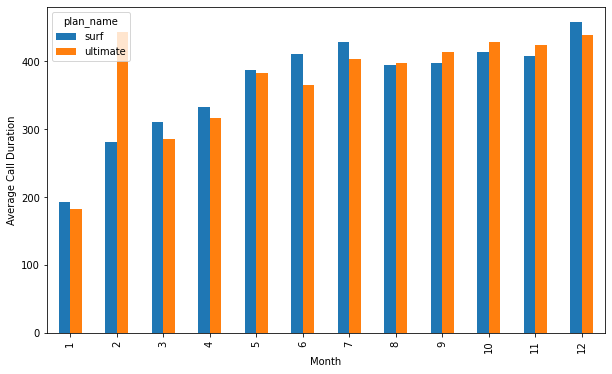

In [32]:
# Comparando a duração média das chamadas de cada plano para cada mês distinto. Crie um gráfico de barras para visualizá-lo.

# Agrupar os dados por mês e plano e calcule a média da duração das chamadas
avg_duration_plan_month = total_monthly_usage.groupby(['month', 'plan_name'])['duration'].mean().unstack()

# Plotar o gráfico de barras
avg_duration_plan_month.plot(xlabel='Month',
                             ylabel='Average Call Duration',
                             kind='bar', 
                             figsize=(10, 6))


plt.show()

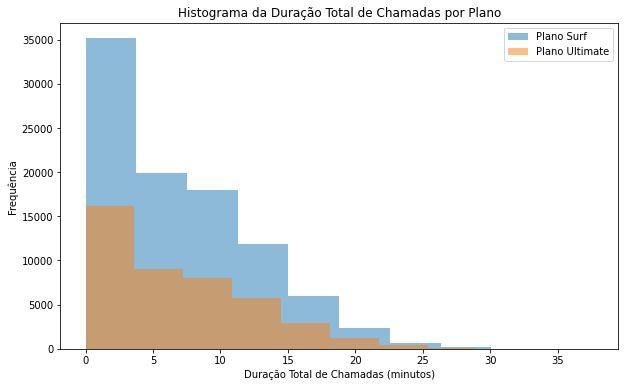

In [33]:
# Comparando o número de minutos de que os usuários de cada plano necessitam a cada mês. Construa um histograma.

# Mesclar os DataFrames "df_calls" e "user_data" na coluna "user_id"
merged_data = df_calls.merge(df_users[['user_id', 'plan']], on='user_id')

# Filtrar os dados para cada plano
surf_data = merged_data[merged_data['plan'] == 'surf']
ultimate_data = merged_data[merged_data['plan'] == 'ultimate']

# Plotar os histogramas para cada plano
plt.figure(figsize=(10, 6))
plt.hist(surf_data['duration'], bins=10, alpha=0.5, label='Plano Surf')
plt.hist(ultimate_data['duration'], bins=10, alpha=0.5, label='Plano Ultimate')
plt.title('Histograma da Duração Total de Chamadas por Plano')
plt.xlabel('Duração Total de Chamadas (minutos)')
plt.ylabel('Frequência')
plt.legend()
plt.show()



In [34]:
# Calculando a média e a variação da duração mensal das chamadas

mean_duration_monthly = df_calls.groupby('month')['duration'].mean()
variance_duration_monthly = df_calls.groupby('month')['duration'].var()
std_duration_monthly = df_calls.groupby('month')['duration'].std() #Desvio padrão



df_mean_variance_duration_monthly = pd.DataFrame({
    'mean_duration_monthly': mean_duration_monthly,
    'variance_duration_monthly': variance_duration_monthly,
    'std__duration_monthly': std_duration_monthly
})

display(df_mean_variance_duration_monthly)

,mean_duration_monthly,variance_duration_monthly,std__duration_monthly
month,,,
1,6.501919,32.741969,5.722060
2,6.701150,34.405031,5.865580
3,6.531315,32.592684,5.709000
4,6.759346,33.013931,5.745775
5,6.739282,34.544859,5.877487
6,6.804571,34.632745,5.884959
7,6.770786,33.808500,5.814508
8,6.690801,33.866955,5.819532
9,6.741825,34.447367,5.869188


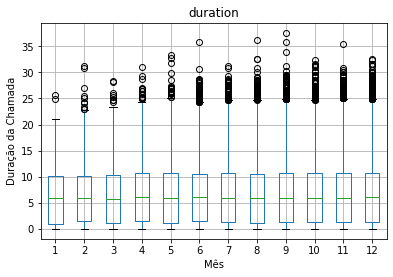

In [35]:
# Diagrama de caixa para visualizar a distribuição da duração mensal das chamadas

df_calls.boxplot(column='duration', by='month')
plt.xlabel('Mês')
plt.ylabel('Duração da Chamada')
plt.suptitle('')

    
plt.show()

<Figure size 720x432 with 0 Axes>

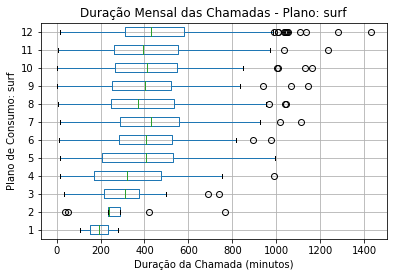

<Figure size 720x432 with 0 Axes>

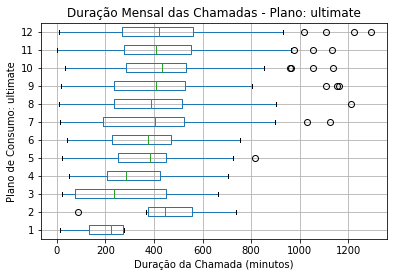

In [36]:
# Dados por plano [plan_name]
grouped_data_duration = total_monthly_usage.groupby('plan_name')

# Criando um boxplot para cada grupo
for name, group in grouped_data_duration:
    plt.figure(figsize=(10, 6))
    group.boxplot(column='duration', by='month', vert=False)
    plt.xlabel('Duração da Chamada (minutos)')
    plt.ylabel('Plano de Consumo: ' + name)
    plt.title('Duração Mensal das Chamadas - Plano: ' + name)
    plt.suptitle('')
    plt.show()

Conclusão: Quem possui o plano Surf tende a ficar mais tempo em ligações, embora a média dos dois planos não seja tão diferente um do outro. E embora o plano Ultimate tenha mais minutos inclusos (3.000, contra 500 do Surf), ainda estão dentro do limite, e possivelmente acham mais vantajoso pagar o plano mais barato.

Mensagens:

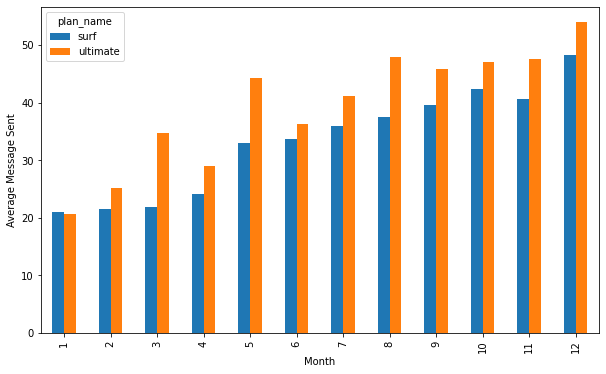

In [37]:
# Compare o número de mensagens que os usuários de cada plano tendem a enviar a cada mês

# Agrupar os dados por mês e plano e calcule a média de envio de mensagens
avg_messages_plan_month = total_monthly_usage.groupby(['month', 'plan_name'])['messages'].mean().unstack()

# Plotar o gráfico de barras
avg_messages_plan_month.plot(xlabel='Month',
                             ylabel='Average Message Sent',
                             kind='bar', 
                             figsize=(10, 6))


plt.show()

In [38]:
print(total_monthly_usage)

      user_id  first_name  last_name  age  \
0        1000    Anamaria      Bauer   45   
1        1001      Mickey  Wilkerson   28   
2        1001      Mickey  Wilkerson   28   
3        1001      Mickey  Wilkerson   28   
4        1001      Mickey  Wilkerson   28   
...       ...         ...        ...  ...   
2288     1349  Florentina       Diaz   69   
2289     1361     Jacelyn    Hoffman   45   
2290     1482      Armand      Glenn   70   
2291     1108    Porfirio       Kane   45   
2292     1311     Cherlyn   Saunders   69   

                                           city  month  duration  messages  \
0         Atlanta-Sandy Springs-Roswell, GA MSA     12    116.83      11.0   
1               Seattle-Tacoma-Bellevue, WA MSA      8    171.14      30.0   
2               Seattle-Tacoma-Bellevue, WA MSA      9    297.69      44.0   
3               Seattle-Tacoma-Bellevue, WA MSA     10    374.11      53.0   
4               Seattle-Tacoma-Bellevue, WA MSA     11    404.59     

<Figure size 720x432 with 0 Axes>

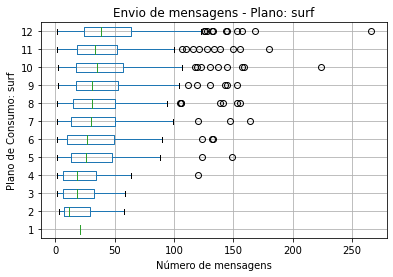

<Figure size 720x432 with 0 Axes>

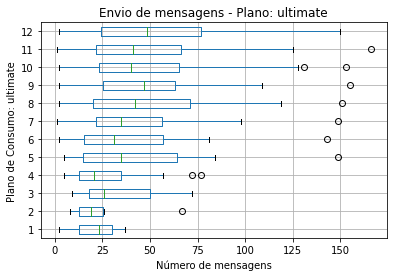

In [39]:
# Mostrando dados de mensagens por plano [plan_name]
grouped_data_message = total_monthly_usage.groupby('plan_name')

# Criar um boxplot para cada grupo
for name, group in grouped_data_message:
    plt.figure(figsize=(10, 6))
    group.boxplot(column='messages', by='month', vert=False)
    plt.xlabel('Número de mensagens')
    plt.ylabel('Plano de Consumo: ' + name)
    plt.title('Envio de mensagens - Plano: ' + name)
    plt.suptitle('')
    plt.show()

Conclusão:
Os usuários do plano 'Ultimate' enviam mais mensagens mensalmente. Por esta análise, conseguimos notar que são clientes que realmente preferem a comunicação por meio de mensagens, já que neste plano estão inclusas 1.000 mensagens por mês, contra apenas 50 do plano Surf. Embora, a média esteja bem abaixo das 1.000 e possivelmente em boa parte dos casos não necessitasse de mais de 50.

Internet:

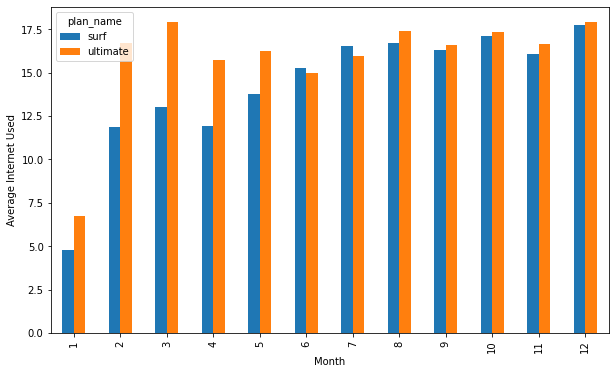

In [40]:
# Comparando a quantidade de tráfego de internet consumido pelos usuários por plano

# Agrupar os dados por mês e plano e calcule a média de consumo de internet
avg_internet_plan_month = total_monthly_usage.groupby(['month', 'plan_name'])['gb_used'].mean().unstack()

# Plotar o gráfico de barras
avg_internet_plan_month.plot(xlabel='Month',
                             ylabel='Average Internet Used',
                             kind='bar', 
                             figsize=(10, 6))


plt.show()

In [41]:
# Ultimate: 30 GB por $70

# Surf: 15 GB por $20
# Excedente: $10 por GB

# Se usar 30 GB no Surf, quanto gasta?
surf_30gb = (20 + (15*10))

print('Ultimate: Utilizando 30GB, se gasta $ 70')
print('Surf: Utilizando 30GB, se gasta $', surf_30gb)

Ultimate: Utilizando 30GB, se gasta $ 70
Surf: Utilizando 30GB, se gasta $ 170


In [42]:
print(total_monthly_usage)

      user_id  first_name  last_name  age  \
0        1000    Anamaria      Bauer   45   
1        1001      Mickey  Wilkerson   28   
2        1001      Mickey  Wilkerson   28   
3        1001      Mickey  Wilkerson   28   
4        1001      Mickey  Wilkerson   28   
...       ...         ...        ...  ...   
2288     1349  Florentina       Diaz   69   
2289     1361     Jacelyn    Hoffman   45   
2290     1482      Armand      Glenn   70   
2291     1108    Porfirio       Kane   45   
2292     1311     Cherlyn   Saunders   69   

                                           city  month  duration  messages  \
0         Atlanta-Sandy Springs-Roswell, GA MSA     12    116.83      11.0   
1               Seattle-Tacoma-Bellevue, WA MSA      8    171.14      30.0   
2               Seattle-Tacoma-Bellevue, WA MSA      9    297.69      44.0   
3               Seattle-Tacoma-Bellevue, WA MSA     10    374.11      53.0   
4               Seattle-Tacoma-Bellevue, WA MSA     11    404.59     

<Figure size 720x432 with 0 Axes>

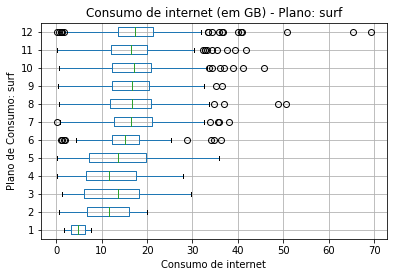

<Figure size 720x432 with 0 Axes>

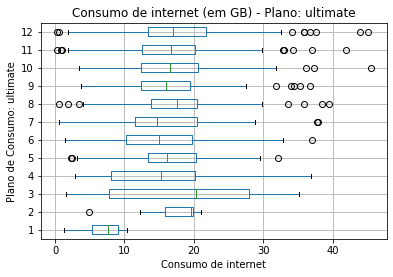

In [43]:
# Distribuição dos dados de consumo de internet usando um boxplot:
    
grouped_data_internet = total_monthly_usage.groupby('plan_name')

# Criar um boxplot para cada grupo
for name, group in grouped_data_internet:
    plt.figure(figsize=(10, 6))
    group.boxplot(column='gb_used', by='month', vert=False)
    plt.xlabel('Consumo de internet')
    plt.ylabel('Plano de Consumo: ' + name)
    plt.title('Consumo de internet (em GB) - Plano: ' + name)
    plt.suptitle('')
    plt.show()

In [44]:
# Calculando o desvio padrão:
std_internet_monthly = df_internet.groupby('month')['gb_used'].std() #Desvio padrão

df_mean_variance_internet_monthly = pd.DataFrame({
    'std_internet_monthly': std_internet_monthly
})

display(df_mean_variance_internet_monthly)

,std_internet_monthly
month,
1,0.275251
2,0.244486
3,0.261887
4,0.249482
5,0.247992
6,0.250680
7,0.249256
8,0.249736
9,0.250413


Conclusão:
Em boa parte dos meses, quem possui o plano Ultimate consome mais internet do que quem possui o Surf. Por possuir mais dados disponíveis dentro do pacote, para quem utiliza mais, acaba valendo a pena financeiramente. Se o usuário for utilizar os mesmos 30GB no plano Surf, fica muito mais caro.

Receita:

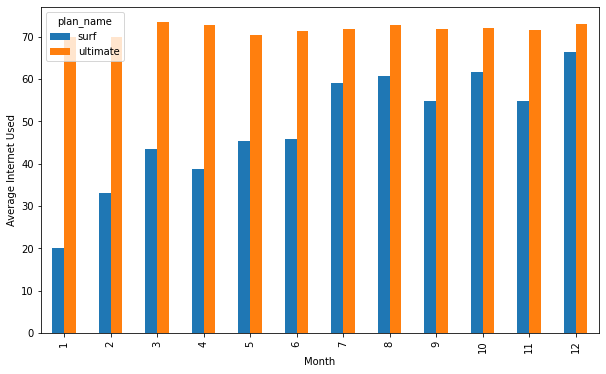

In [45]:
# Receita por plano:

# Agrupando os dados por mês e plano e calcule a média da receita:
avg_revenue_plan_month = total_monthly_usage_merge.groupby(['month', 'plan_name'])['revenue'].mean().unstack()

# Plotar o gráfico de barras
avg_revenue_plan_month.plot(xlabel='Month',
                             ylabel='Average Internet Used',
                             kind='bar', 
                             figsize=(10, 6))


plt.show()

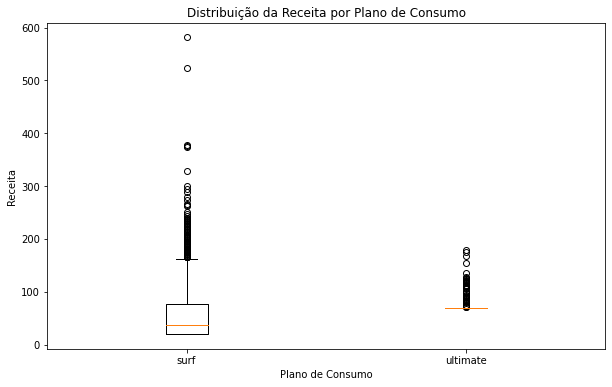

In [46]:
# Receita por plano:
revenue_by_plan = total_monthly_usage_merge.groupby('plan_name')['revenue'].apply(list)

# Plotar o boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(revenue_by_plan.values, labels=revenue_by_plan.index)
plt.xlabel('Plano de Consumo')
plt.ylabel('Receita')
plt.title('Distribuição da Receita por Plano de Consumo')
plt.show()

In [47]:
# Média de receita por plano e mês
mean_revenue_monthly = total_monthly_usage_merge.groupby(['month', 'plan_name'])['revenue'].mean().unstack()

# Média total de receita por mês
mean_revenue_monthly_total = total_monthly_usage_merge.groupby('month')['revenue'].mean()

# Desvio padrão de receita por plano e mês
std_revenue_monthly = total_monthly_usage_merge.groupby(['month', 'plan_name'])['revenue'].std().unstack()

# Desvio padrão total de receita por mês
std_revenue_monthly_total = total_monthly_usage_merge.groupby('month')['revenue'].std()

# Criar um DataFrame com as informações
revenue_info = pd.concat([mean_revenue_monthly, mean_revenue_monthly_total.rename('mean_revenue_total'), 
                          std_revenue_monthly, std_revenue_monthly_total.rename('std_revenue_total')], axis=1)

# Exibir o DataFrame
display(revenue_info)

,surf,ultimate,mean_revenue_total,surf,ultimate,std_revenue_total
month,,,,,,
1,20.000000,70.000000,53.333333,0.000000,0.000000,25.819889
2,33.003956,70.000000,49.189725,19.335157,0.000000,23.636231
3,43.578788,73.392448,53.800615,37.396658,10.462798,33.859851
4,38.777485,72.771377,48.832017,33.041649,10.623172,32.258431
5,45.346471,70.515720,52.232398,42.436576,2.777235,37.850168
6,45.920653,71.476980,54.261954,42.705486,7.693704,37.255636
7,59.171272,71.850414,63.327213,52.733236,9.964495,43.954657
8,60.650127,72.680102,64.315914,58.498266,11.702393,49.466111
9,54.923685,71.812310,60.110906,45.788240,7.821394,39.113465


Conclusão:
Considerando que o plano Suft custa 20 por mês e o Ultimate custa 70, podemos analisar que quem possui o plano Suft, costuma ultrapassar consideravelmente o valor do pacote, enquanto do Ultimate ultrapassa bem pouco. De qualquer forma, na média, mesmo com excedentes, os valores do Surf não ultrapassam o Ultimate.


**Teste hipóteses estatísticas**

Hipótese nula (𝐻0): Receitas médias Ultimate = Surf

Hipótese alternativa (H1): Receitas médias Ultimate ≠ Surf

Valor alpha - α = 0.05

In [48]:
# Testando as hipóteses

# Dividir os dados em dois grupos: Ultimate e Surf
# Surf:
users_surf = total_monthly_usage_merge[total_monthly_usage_merge['plan_name'] == 'surf']['revenue']

# Ultimate:
users_ultimate = total_monthly_usage_merge[total_monthly_usage_merge['plan_name'] == 'ultimate']['revenue']

alpha = 0.05

# T test de Student assumindo variâncias diferentes
results = st.ttest_ind(users_surf, users_ultimate, equal_var=False) 

valorp = results.pvalue
print(valorp) #valor de p obtido

# Interpretar os resultados do teste
if valorp < alpha:
    print('Rejeitamos a hipótese nula.')
else:
    print('Não podemos rejeitar a hipótese nula.')

4.881852673479799e-25
Rejeitamos a hipótese nula.


Conclusão: Rejeitamos a hipótese nula, ou seja, há evidências para afirmar que as médias das receitas dos planos Surf e Ultimate são estatisticamente diferentes.

In [49]:
# Filtrar usuários da área de NY-NJ
revenue_nynj = total_monthly_usage_merge[total_monthly_usage_merge['city'].str.contains('NY-NJ')]['revenue']

# Filtrar usuários de outras áreas
revenue_others = total_monthly_usage_merge[~total_monthly_usage_merge['city'].str.contains('NY-NJ')]['revenue']

# Aplicar o teste t de Student
_statistic, p_value = ttest_ind(revenue_nynj, revenue_others, equal_var=False)  # Assumindo diferença nas variâncias

alpha = 0.05

results=st.ttest_ind(revenue_nynj,revenue_others) #ttest
valorp=results.pvalue
print(valorp) #valor de t obtido

# Interpretar os resultados do teste
if p_value < alpha:
    print('Receita média da região NY-NJ difere das outras')
else:
    print('Receita média da região NY-NJ não difere das outras')

0.02610170442540567
Receita média da região NY-NJ difere das outras


Conclusão: Não foram encontradas evidências significativas para concluir que a receita média dos usuários da região NY-NJ difere da receita média dos usuários de outras áreas. Portanto, não podemos rejeitar a hipótese nula de que não há diferença na receita média entre os dois grupos.

## Conclusão geral

Os dados dos diferentes dataframes foram corrigidos e padronizados para facilitar e deixas as informações mais certeiras.
Depois, analisamos o comportamento dos usuários por mês e por plano, isso nos ajudou a ter uma ideia sobre os clientes em geral e seu comportamento, bem como seu impacto no faturamento por mês.

Conclusões:

    - Usuários do plano Surf ficam em média mais tempo em ligação,
    - Usuários do plano Ultimate tendem a enviar mais mensagens,
    - Em relação ao uso de internet, usuários do plano Ultimate utilizam mais, e nos primeiros meses do ano a diferença é maior.

Em termos de receita, a receita total obtida pelos usuários do plano Ultimate é consideravelmente maior em comparação com a receita obtida pelos usuários do plano Surf.